In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil

!apt-get -y -qq install postgresql postgresql-contrib &> /dev/null
!service postgresql start
!sudo -u postgres createuser --superuser adsdb
!sudo -u postgres createdb adsdb
!sudo -u postgres psql -c "ALTER USER adsdb WITH PASSWORD 'adsdb';"

drive_path = "/content/drive/MyDrive/ADSDB/trusted/dumpfile.sql"
dump_path= "/content/dumpfile.sql"
# Check if the dumpfile exists in the Google Drive
if not os.path.exists(drive_path):
  print("Dump file not found in Google Drive.")


# Copy the dumpfile from Google Drive to Colab's environment
shutil.copy(drive_path, dump_path)
# Create a temporary .pgpass file for authentication
with open("/root/.pgpass", "w") as f:
  f.write("*:*:*:adsdb:adsdb")
os.chmod("/root/.pgpass", 0o600)  # Set the required permissions



 * Starting PostgreSQL 14 database server
   ...done.
ALTER ROLE


In [ ]:
import psycopg2
import pandas as pd

# Create a dictionary to store DataFrames and lengths for each table
dataframes = {}

try:
    !PGPASSFILE=/root/.pgpass psql -h localhost -U adsdb -d adsdb < "{dump_path}"
    print("Restoration successful!")

    # Connect to the restored database
    conn = psycopg2.connect(database="adsdb", user="adsdb", host="localhost", password="adsdb")

    # Create a cursor object to interact with the database
    cur = conn.cursor()

    # Query the list of tables in the database
    cur.execute("SELECT table_name FROM information_schema.tables WHERE table_schema = 'public'")

    # Fetch all table names
    tables = cur.fetchall()

    if tables:
        for table in tables:
            table_name = table[0]

            # Fetch both column names and data in a single query
            cur.execute(f"SELECT * FROM {table_name}")
            table_data = cur.fetchall()
            column_names = [desc[0] for desc in cur.description]

            # Create a Pandas DataFrame from the fetched data and column names
            df = pd.DataFrame(table_data, columns=column_names)

            # Save the DataFrame in the dataframes dictionary
            dataframes[table_name] = df

            # Get the length (number of rows) of the DataFrame
            num_rows = len(df)

            # Print the table name, number of rows, and the first few rows of the DataFrame
            print(f"Table: {table_name} | Number of Rows: {num_rows}")
            print(df.head())

    else:
        print("No tables found in the database.")

    # Close the cursor and connection
    cur.close()
    conn.close()

except Exception as e:
    print(f"Error during restoration: {e}")


SET
SET
SET
SET
SET
 set_config 
------------
 
(1 row)

SET
SET
SET
SET
SET
SET
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
CREATE TABLE
ALTER TABLE
COPY 28620
COPY 14400
COPY 900
COPY 15
Restoration successful!
Table: final_employment_rate | Number of Rows: 28620
   id  year         sex       provinces              rates  total  quarter
0   1  2008  Both sexes  National Total      Activity rate  60.35        4
1   2  2008  Both sexes  National Total      Activity rate  60.23        3
2   3  2008  Both sexes  National Total      Activity rate  60.07        2
3   4  2008  Both sexes  National Total      Activity rate  59.67        1
4   5  2008  Both sexes  National Total  Unemployment rate  13.79        4
Table: final_house_price_index | Number of Rows: 14400
   id  year national_total autonomous_communities_and_cities index_type  \
0   1  2008       Nacional                               NaN    General   
1   2  2008       Nacional                      

In [ ]:
df_house_i= dataframes['final_house_price_index']
df_house_w = dataframes['final_house_price_index_weights']
df_inflation = dataframes['final_inflation_rate']
df_employment = dataframes['final_employment_rate']
df_employment.head()
#print(df['year'])

,id,year,sex,provinces,rates,total,quarter
0,1,2008,Both sexes,National Total,Activity rate,60.35,4
1,2,2008,Both sexes,National Total,Activity rate,60.23,3
2,3,2008,Both sexes,National Total,Activity rate,60.07,2
3,4,2008,Both sexes,National Total,Activity rate,59.67,1
4,5,2008,Both sexes,National Total,Unemployment rate,13.79,4


In [ ]:
def data_profile(df):
  # 1. Basic Statistics
  if 'total' in df.columns:
    df['total'] = pd.to_numeric(df['total'], errors='coerce')
  summary_stats = df.describe()
  print(summary_stats)
  print('-' * 40)

  # 2. Data Type Assessment
  data_types = df.dtypes
  print(data_types)
  print('-' * 40)

  # 3. Missing Value Analysis
  missing_values = df.isnull().sum()
  print(missing_values)
  nan_counts = df.isna().sum()
  print(nan_counts)
  print('-' * 40)





In [ ]:
data_profile(df_employment)


                 id          year         total       quarter
count  28620.000000  28620.000000  28620.000000  28620.000000
mean     954.500000   2015.000000     41.076034      2.500000
std      550.801704      4.320569     18.078979      1.118054
min        1.000000   2008.000000      2.000000      1.000000
25%      477.750000   2011.000000     23.690000      1.750000
50%      954.500000   2015.000000     46.185000      2.500000
75%     1431.250000   2019.000000     55.432500      3.250000
max     1908.000000   2022.000000     76.860000      4.000000
----------------------------------------
id             int64
year           int64
sex           object
provinces     object
rates         object
total        float64
quarter        int64
dtype: object
----------------------------------------
id           0
year         0
sex          0
provinces    0
rates        0
total        0
quarter      0
dtype: int64
id           0
year         0
sex          0
provinces    0
rates        0
total 

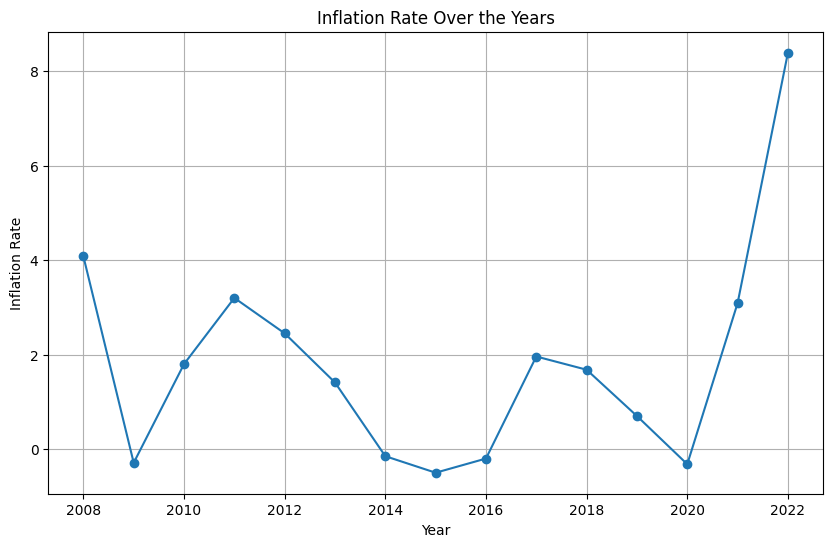

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_inflation['year'], df_inflation['inflation_rate_percent'], marker='o', linestyle='-')
plt.title('Inflation Rate Over the Years')
plt.xlabel('Year')
plt.ylabel('Inflation Rate')
plt.grid(True)
plt.show()

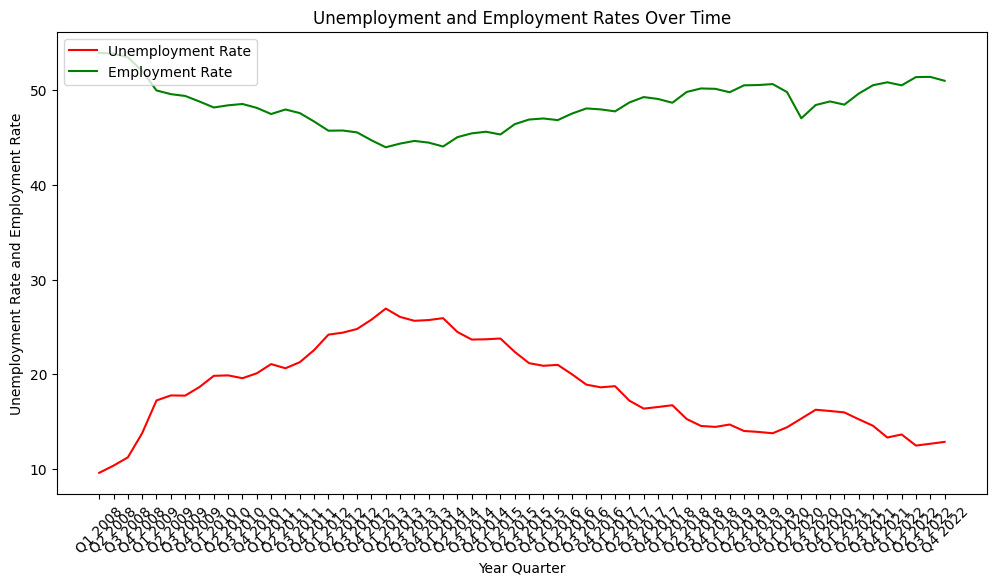

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame for 'Unemployment rate' and 'Employment rate'
unemployment_df = df_employment[(df_employment['provinces'] == 'National Total') &
                                (df_employment['rates'] == 'Unemployment rate') &
                                (df_employment['sex'] == 'Both sexes')]

employment_df = df_employment[(df_employment['provinces'] == 'National Total') &
                             (df_employment['rates'] == 'Employment rate') &
                             (df_employment['sex'] == 'Both sexes')]

# Sort the DataFrames
unemployment_df = unemployment_df.sort_values(by=['year', 'quarter'])
employment_df = employment_df.sort_values(by=['year', 'quarter'])

# Create a new column for 'year_quarter'
unemployment_df['year_quarter'] = 'Q' + unemployment_df['quarter'].astype(str) + ' ' + unemployment_df['year'].astype(str)
employment_df['year_quarter'] = 'Q' + employment_df['quarter'].astype(str) + ' ' + employment_df['year'].astype(str)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data for 'Unemployment rate' in red
ax.plot(unemployment_df['year_quarter'], unemployment_df['total'], color='red', label='Unemployment Rate')

# Plot the data for 'Employment rate' in green
ax.plot(employment_df['year_quarter'], employment_df['total'], color='green', label='Employment Rate')

# Set labels and titles
ax.set_xlabel('Year Quarter')
ax.set_ylabel('Unemployment Rate and Employment Rate', color='black')
plt.title('Unemployment and Employment Rates Over Time')

# Display legends
ax.legend(loc='upper left')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


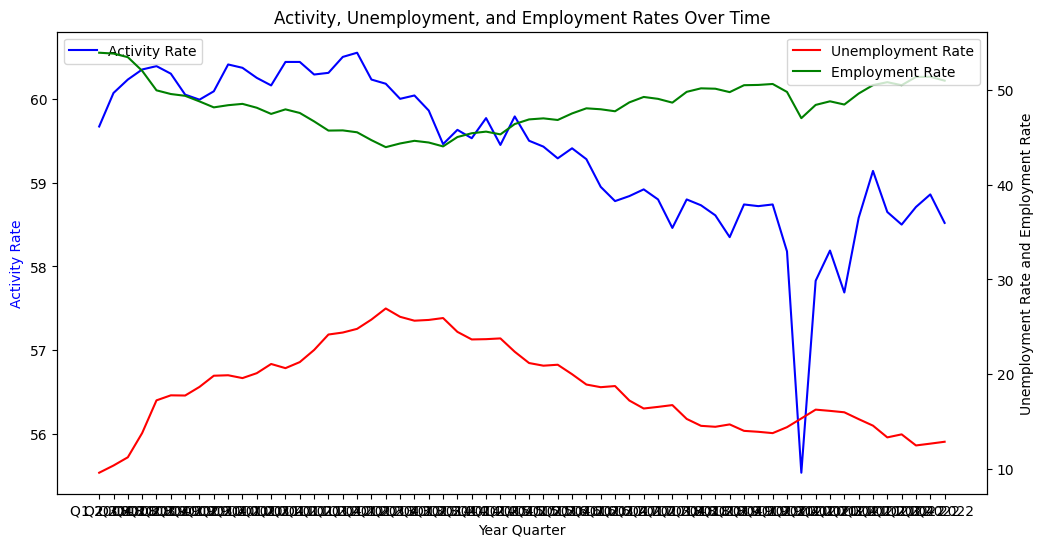

In [ ]:


import matplotlib.pyplot as plt

# Filter the DataFrame for 'Activity rate,' 'Unemployment rate,' and 'Employment rate'
activity_df = df_employment[(df_employment['provinces'] == 'National Total') &
                            (df_employment['rates'] == 'Activity rate') &
                            (df_employment['sex'] == 'Both sexes')]

unemployment_df = df_employment[(df_employment['provinces'] == 'National Total') &
                                (df_employment['rates'] == 'Unemployment rate') &
                                (df_employment['sex'] == 'Both sexes')]

employment_df = df_employment[(df_employment['provinces'] == 'National Total') &
                             (df_employment['rates'] == 'Employment rate') &
                             (df_employment['sex'] == 'Both sexes')]

# Sort the DataFrames
activity_df = activity_df.sort_values(by=['year', 'quarter'])
unemployment_df = unemployment_df.sort_values(by=['year', 'quarter'])
employment_df = employment_df.sort_values(by=['year', 'quarter'])

# Create a new column for 'year_quarter'
activity_df['year_quarter'] = 'Q' + activity_df['quarter'].astype(str) + ' ' + activity_df['year'].astype(str)
unemployment_df['year_quarter'] = 'Q' + unemployment_df['quarter'].astype(str) + ' ' + unemployment_df['year'].astype(str)
employment_df['year_quarter'] = 'Q' + employment_df['quarter'].astype(str) + ' ' + employment_df['year'].astype(str)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the data for 'Activity rate' in blue
ax1.plot(activity_df['year_quarter'], activity_df['total'], color='blue', label='Activity Rate')

# Set the labels and title for the first y-axis
ax1.set_xlabel('Year Quarter')
ax1.set_ylabel('Activity Rate', color='blue')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the data for 'Unemployment rate' in red
ax2.plot(unemployment_df['year_quarter'], unemployment_df['total'], color='red', label='Unemployment Rate')

# Plot the data for 'Employment rate' in green
ax2.plot(employment_df['year_quarter'], employment_df['total'], color='green', label='Employment Rate')

# Set the labels and title for the second y-axis
ax2.set_ylabel('Unemployment Rate and Employment Rate', color='black')

# Set the title
plt.title('Activity, Unemployment, and Employment Rates Over Time')

# Display legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


<ipython-input-33-7568c7bb0465>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year_quarter'] = filtered_df['year'].astype(str) + '-' + filtered_df['quarter'].astype(str)


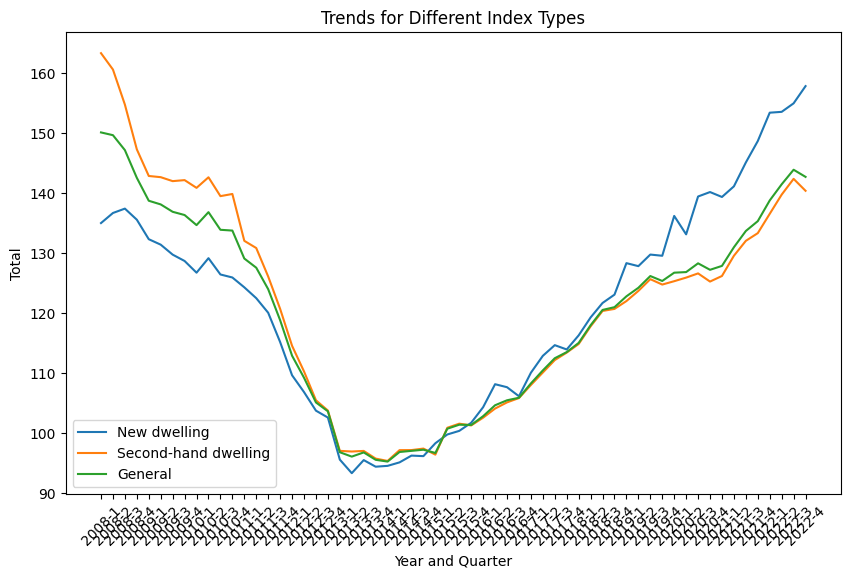

In [ ]:
# Filter the DataFrame
filtered_df = df_house_i[(df_house_i['national_total'] == 'Nacional') &
                         (df_house_i['indices_and_rates'] == 'Index') &
                         (df_house_i['autonomous_communities_and_cities'] == 'NaN')
                        ]
# Convert 'year' and 'quarter' columns to a single datetime column
filtered_df['year_quarter'] = filtered_df['year'].astype(str) + '-' + filtered_df['quarter'].astype(str)

# Sort the DataFrame by 'year_quarter' in ascending order
filtered_df = filtered_df.sort_values(by='year_quarter')

# Create a plot for all three index types on the same graph
plt.figure(figsize=(10, 6))

# Define the index types for the three plots
index_types = ['New dwelling', 'Second-hand dwelling', 'General']

# Create a plot for each index type
for index_type in index_types:
    plt.plot(filtered_df[filtered_df['index_type'] == index_type]['year_quarter'],
             filtered_df[filtered_df['index_type'] == index_type]['total'],
             label=index_type)

plt.title('Trends for Different Index Types')
plt.xlabel('Year and Quarter')
plt.ylabel('Total')
plt.legend()
plt.xticks(rotation=45)

plt.show()

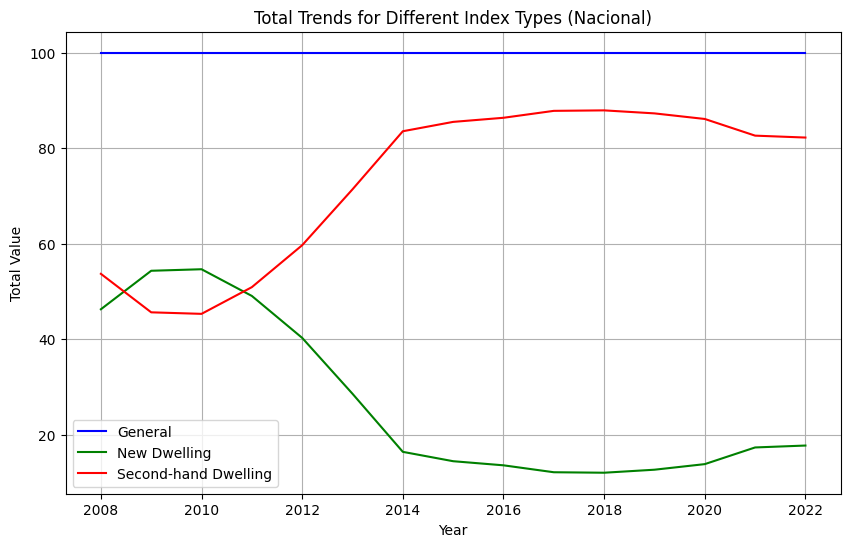

In [ ]:
# Filter the DataFrame to select rows where 'autonomous_communities_and_cities' is 'Nacional'
nacional_df = df_house_w[df_house_w['autonomous_communities_and_cities'] == 'Nacional']

# Filter the DataFrame further to create separate DataFrames for different 'index_type'
general_df = nacional_df[nacional_df['index_type'] == 'General']
new_dwelling_df = nacional_df[nacional_df['index_type'] == 'New dwelling']
second_hand_dwelling_df = nacional_df[nacional_df['index_type'] == 'Second-hand dwelling']

# Create a plot with the three trends
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

plt.plot(general_df['year'], general_df['total'], label='General', color='blue')
plt.plot(new_dwelling_df['year'], new_dwelling_df['total'], label='New Dwelling', color='green')
plt.plot(second_hand_dwelling_df['year'], second_hand_dwelling_df['total'], label='Second-hand Dwelling', color='red')

# Customize the plot
plt.title('Total Trends for Different Index Types (Nacional)')
plt.xlabel('Year')
plt.ylabel('Total Value')
plt.legend()  # Show a legend with labels

# Display the plot
plt.grid(True)
plt.show()